# Initial Set up

In [111]:
import pandas as pd

LABELED_PATH = "../data/processed/wintermute_transfers_clean_defi.parquet"  # adjust if you used .csv
df_defi = pd.read_parquet(LABELED_PATH)
display(df_defi.shape)
display(df_defi.info())

(365667, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365667 entries, 0 to 365666
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     365667 non-null  object 
 1   from_address  365667 non-null  object 
 2   from_entity   365667 non-null  object 
 3   to_address    365667 non-null  object 
 4   to_entity     365667 non-null  object 
 5   token         365667 non-null  object 
 6   value         365667 non-null  float64
 7   usd           365667 non-null  float64
 8   tx_hash       365667 non-null  object 
 9   chain         365667 non-null  object 
 10  block_number  365667 non-null  float64
dtypes: float64(3), object(8)
memory usage: 30.7+ MB


None

# Frquency Top 10

,token,tx_count
0,USDC,108586
1,WSOL,96212
2,SOL,47688
3,WETH,39392
4,USDT,16739
5,WBTC,12525
6,cbBTC,8854
7,ARB,5159
8,WBNB,2765
9,JUP,2432


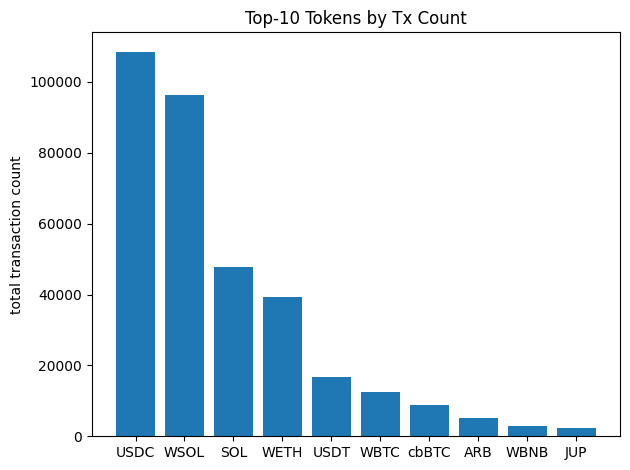

In [112]:
import matplotlib.pyplot as plt

top_freq = (
    df_defi["token"]
    .value_counts()
    .head(10)
    .rename_axis("token")
    .reset_index(name="tx_count")
)
display(top_freq)

plt.bar(top_freq['token'],top_freq['tx_count'])
plt.ylabel("total transaction count")
plt.title("Top-10 Tokens by Tx Count")
plt.tight_layout()

,token,tx_count
7,ARB,5159
9,JUP,2432
12,RAY,1713
13,RENDER,1551
14,JitoSOL,1257
15,BOME,1004
17,$WIF,894
18,JTO,756
19,VIRTUAL,730
20,PYTH,724


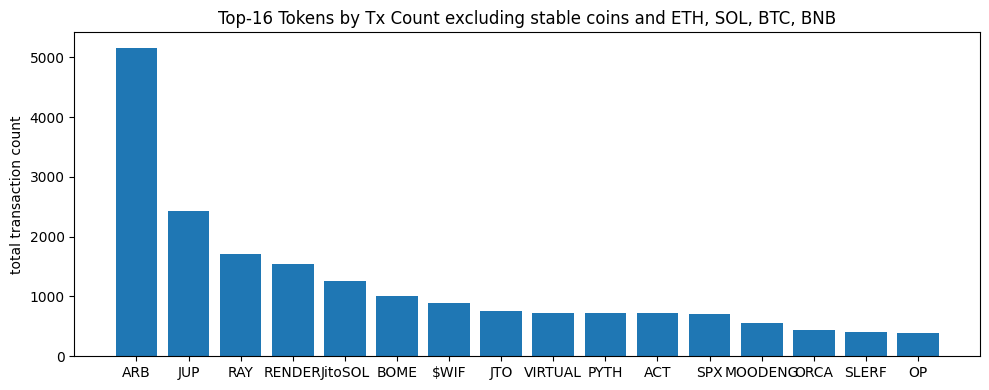

In [113]:
top_freq_30 = (
    df_defi["token"]
    .value_counts()
    .head(30)
    .rename_axis("token")
    .reset_index(name="tx_count")
)

non_rail_coins_freq = ["ARB","JUP","Bank","RAY","RENDER","JitoSOL","BOME","$WIF","JTO","VIRTUAL","PYTH","ACT","SPX","MOODENG","ORCA","SLERF","OP"]
top_freq_non_rail = top_freq_30[top_freq_30['token'].isin(non_rail_coins_freq)]
display(top_freq_non_rail)

plt.figure(figsize=(10,4))
plt.bar(top_freq_non_rail['token'],top_freq_non_rail['tx_count'])
plt.ylabel("total transaction count")
plt.title("Top-16 Tokens by Tx Count excluding stable coins and ETH, SOL, BTC, BNB")
plt.tight_layout()

# Volume top-10

,token,raw_volume_usd
0,USDC,2.894539e+08
1,WETH,2.467877e+08
2,WSOL,8.240565e+07
3,USDT,6.915538e+07
4,WBTC,6.076810e+07
5,cbBTC,5.757610e+07
6,WBNB,1.004289e+07
7,BTCB,6.434839e+06
8,DAI,5.547750e+06
9,AAVE,3.193082e+06


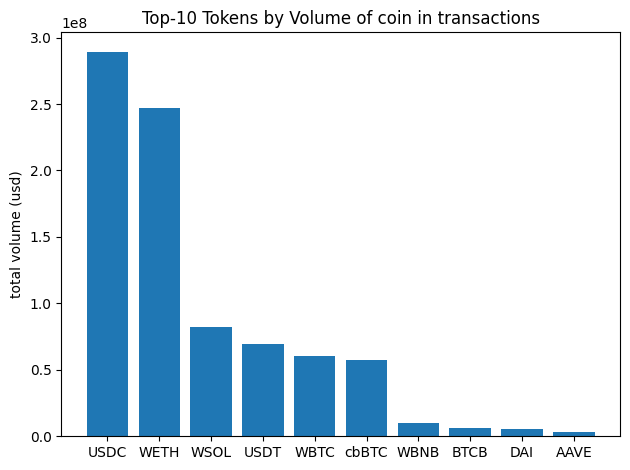

In [114]:
top_vol_usd = (
    df_defi.groupby("token")['usd'].apply(pd.DataFrame).abs().sum()
    .sort_values(ascending=False)
    .head(10)
    .rename_axis("token")
    .reset_index(name="raw_volume_usd")
)
display(top_vol_usd)

plt.bar(top_vol_usd['token'],top_vol_usd['raw_volume_usd'])
plt.ylabel("total volume (usd)")
plt.title("Top-10 Tokens by Volume of coin in transactions")
plt.tight_layout()

# Volume top-10 for non stable coins and non ETH, SOl, BTC, BNB

,token,raw_volume_usd
9,AAVE,3.193082e+06
11,ARB,2.776560e+06
12,LINK,1.413889e+06
13,UNI,1.350996e+06
16,Cake,1.070955e+06
18,PEPE,7.178487e+05
20,SPX,6.635811e+05
23,SKY,6.173505e+05
24,LDO,5.948422e+05
25,JUP,5.924169e+05


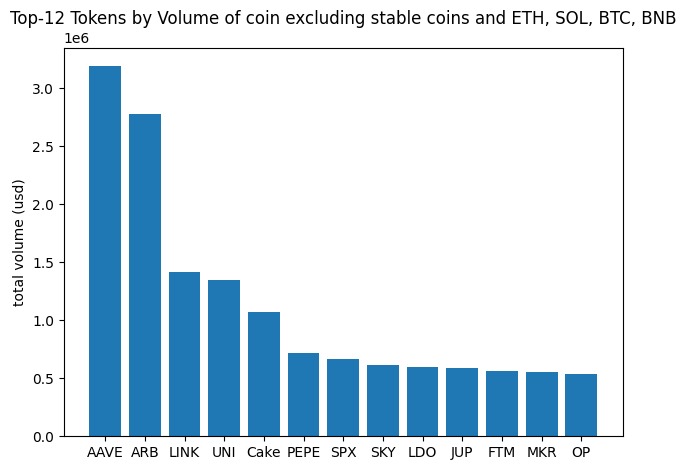

In [115]:
top_vol_usd_30 = (
    df_defi.groupby("token")['usd'].apply(pd.DataFrame).abs().sum()
    .sort_values(ascending=False)
    .head(30)
    .rename_axis("token")
    .reset_index(name="raw_volume_usd")
)
non_rail_coins = ["AAVE","ARB","LINK","UNI","Cake","PEPE","SPX","Bank","SKY","LDO","JUP","FTM","MKR","OP"]
top_vol_usd_non_rail = top_vol_usd_30[top_vol_usd_30['token'].isin(non_rail_coins)]
display(top_vol_usd_non_rail)

plt.bar(top_vol_usd_non_rail['token'],top_vol_usd_non_rail['raw_volume_usd'])
plt.ylabel("total volume (usd)")
plt.title("Top-12 Tokens by Volume of coin excluding stable coins and ETH, SOL, BTC, BNB")
plt.tight_layout()

# Volume worst-10

,token,raw_volume_usd
0,REQ,1120.079322
1,ACH,1058.009785
2,NEIRO,1054.252827
3,STRK,818.012673
4,ARKM,296.954624
5,JASMY,294.684488
6,SKL,271.050957
7,BAT,198.776149
8,HFT,14.929922
9,MANA,0.000000


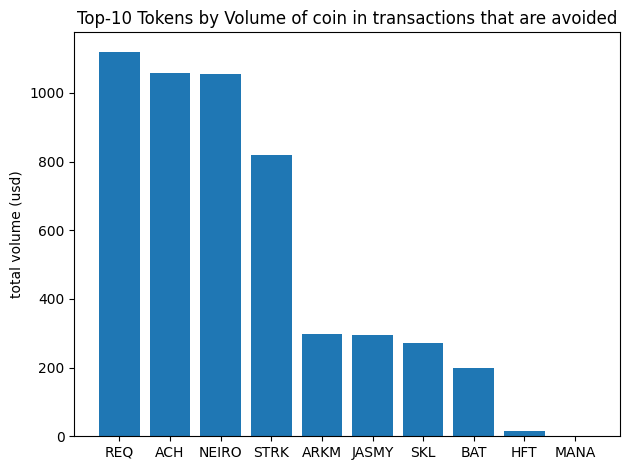

In [116]:
top_vol_usd = (
    df_defi.groupby("token")['usd'].apply(pd.DataFrame).abs().sum()
    .sort_values(ascending=False)
    .tail(10)
    .rename_axis("token")
    .reset_index(name="raw_volume_usd")
)
display(top_vol_usd)

plt.bar(top_vol_usd['token'],top_vol_usd['raw_volume_usd'])
plt.ylabel("total volume (usd)")
plt.title("Top-10 Tokens by Volume of coin in transactions that are avoided")
plt.tight_layout()

# Chain Top-10

,chain,tx_count
0,solana,250314
1,arbitrum_one,65426
2,base,20833
3,ethereum,18462
4,bsc,7312
5,optimism,3320


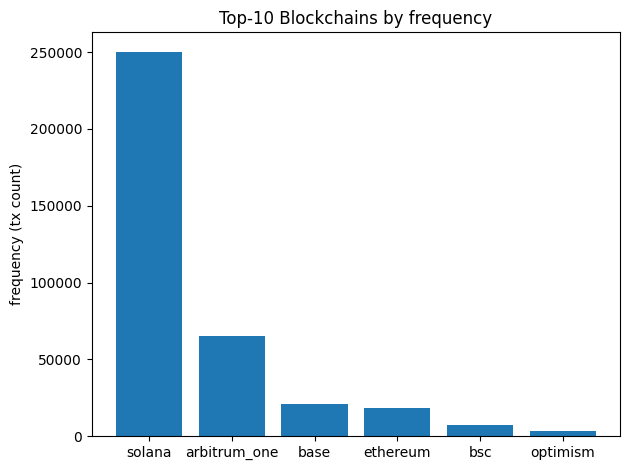

In [122]:
top_chain = (
    df_defi["chain"]
    .value_counts()
    .head(10)
    .rename_axis("chain")
    .reset_index(name="tx_count")
)
display(top_chain)

plt.bar(top_chain['chain'],top_chain['tx_count'])
plt.ylabel("frequency (tx count)")
plt.title("Top-10 Blockchains by frequency")
plt.tight_layout()


,chain,total_volume_usd
0,ethereum,4.365545e+08
1,solana,1.826917e+08
2,base,1.468292e+08
3,arbitrum_one,5.662156e+07
4,bsc,3.192894e+07
5,optimism,6.777426e+06


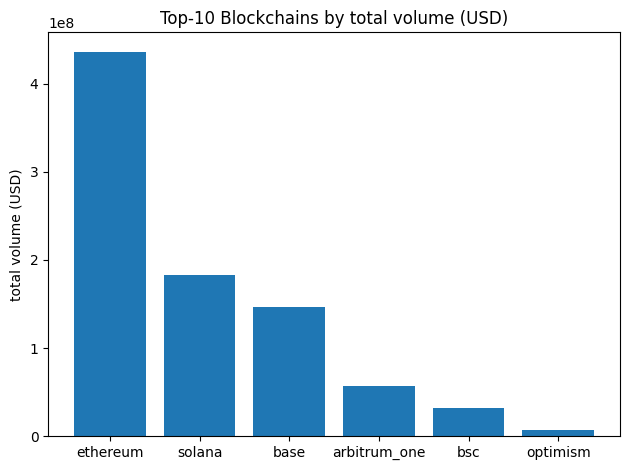

In [118]:
top_chain_vol = (
    df_defi.groupby("chain")['usd'].apply(pd.DataFrame).abs().sum()
    .sort_values(ascending=False)
    .rename_axis("chain")
    .reset_index(name="total_volume_usd")
)
display(top_chain_vol)

plt.bar(top_chain_vol['chain'],top_chain_vol['total_volume_usd'])
plt.ylabel("total volume (USD)")
plt.title("Top-10 Blockchains by total volume (USD)")
plt.tight_layout()

# Entity Top-10

In [119]:
df_defi_from = df_defi[df_defi['from_entity']!='Wintermute']
df_defi_from = df_defi_from.rename(columns={"from_address": "address", "from_entity": "entity"})

df_defi_to = df_defi[df_defi['to_entity']!='Wintermute']
df_defi_to = df_defi_to.rename(columns={"to_address": "address", "to_entity": "entity"})

df_defi_non_wintermute = (
    pd.concat([df_defi_from, df_defi_to], ignore_index=True)
    .drop(columns=['from_address','from_entity',
                'to_address','to_entity'])
    .reset_index(drop=True)
    .sort_values('entity')
)

,total_usd
entity,
Uniswap,3.517535e+08
Aerodrome Finance,1.095274e+08
Orca,8.540257e+07
CoW Protocol,6.902442e+07
Meteora (Prev. Mercurial),6.599261e+07
Fluid (Instadapp),4.960157e+07
PancakeSwap,4.538136e+07
Rizzolver (Wintermute),3.161798e+07
Raydium,2.092381e+07


Text(0.5, 1.0, 'Top 10 DeFi Entities by Total USD')

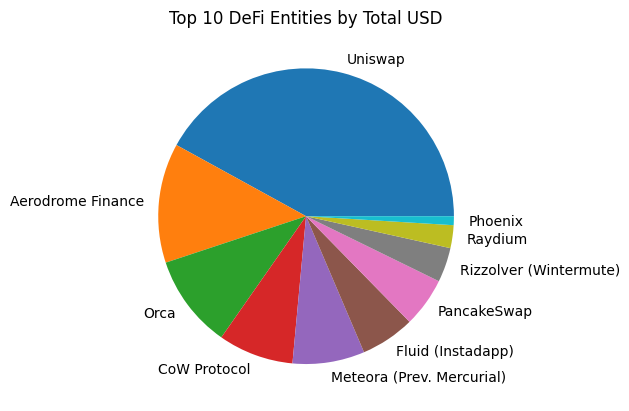

In [129]:
top_entity = (
    df_defi_non_wintermute
    .groupby(by='entity',)
    .agg(total_usd=('usd','sum'))
    .sort_values(by='total_usd',ascending=False)
)
display(top_entity[:10])
top_entity[:10].plot.pie(y='total_usd',legend=False,label="")
plt.title('Top 10 DeFi Entities by Total USD')